In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

### IMPORTING DATASET

In [3]:
data=pd.read_csv("Maternal Health Risk Data Set.csv")
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### VARIABLE INFORMATIONS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


### CHECKING DATATYPE

In [6]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

### CHECKING FOR NULL VALUES

In [7]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

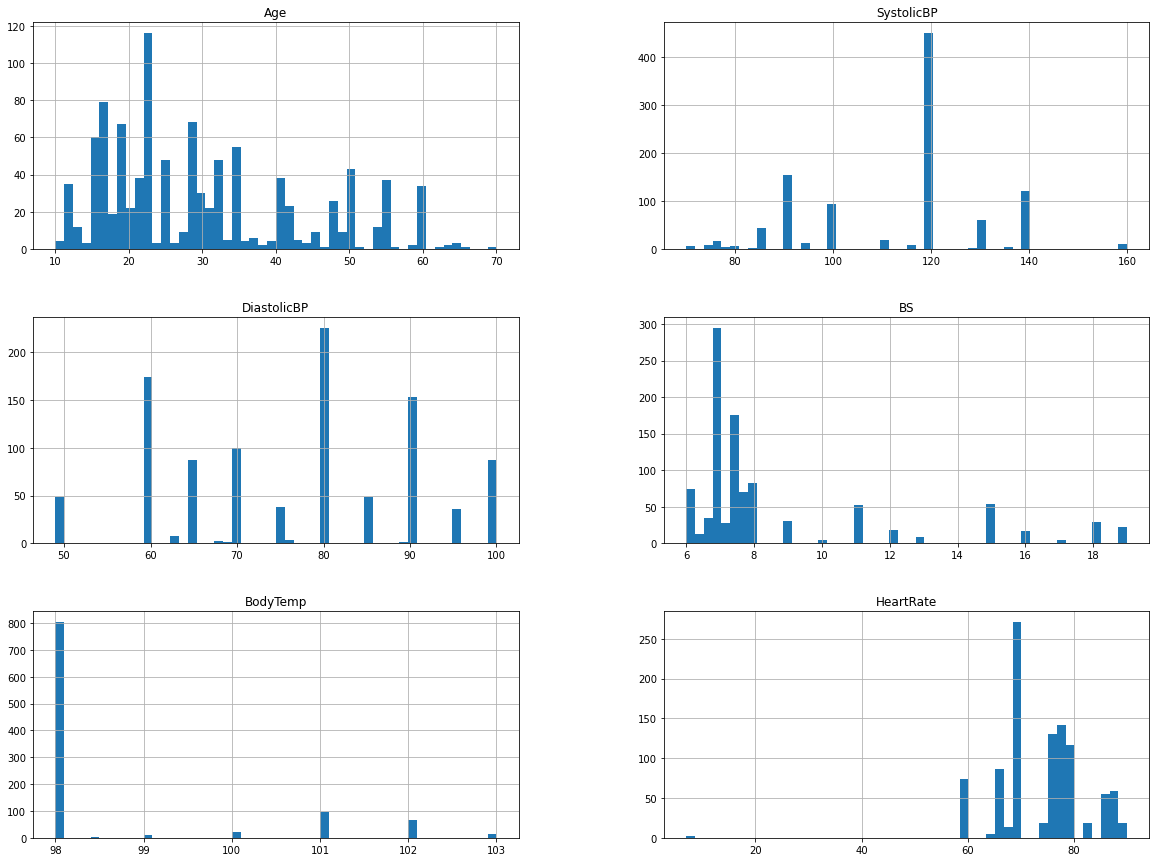

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show()

### CORRELATION BETWEEN VARIABLES

In [9]:
correlation=data.corr()
correlation

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


<AxesSubplot:>

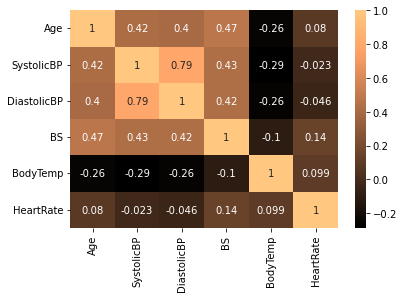

In [10]:
sns.heatmap(correlation,annot=True,cmap='copper')

In [11]:
data=data.drop('HeartRate',axis=1)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,RiskLevel
0,25,130,80,15.0,98.0,high risk
1,35,140,90,13.0,98.0,high risk
2,29,90,70,8.0,100.0,high risk
3,30,140,85,7.0,98.0,high risk
4,35,120,60,6.1,98.0,low risk
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,high risk
1010,55,120,90,18.0,98.0,high risk
1011,35,85,60,19.0,98.0,high risk
1012,43,120,90,18.0,98.0,high risk


In [12]:
x=data.drop('RiskLevel',axis=1)
y=data['RiskLevel']

### MODEL SELECTION

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
d_score=cross_val_score(DecisionTreeClassifier(),X=x,y=y)
rf_score=cross_val_score(RandomForestClassifier(),X=x,y=y,cv=10)
svc_score=cross_val_score(SVC(),X=x,y=y)
lr_score=cross_val_score(LogisticRegression(),X=x,y=y)
print(np.mean(d_score))
print(np.mean(rf_score))
print(np.mean(svc_score))
print(np.mean(lr_score))

0.8047992976637565
0.8233449815569793
0.5769058186606838
0.5818563137101888


#### GRIDSEARCHCV

In [15]:
model=RandomForestClassifier()
params={'n_estimators':[50,100,150,200,250,300]}
gscv=GridSearchCV(model,params,cv=10,return_train_score=True)
gscv.fit(x,y)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             return_train_score=True)

In [16]:
gs_data=gscv.cv_results_
pd.DataFrame(gs_data).sort_values('rank_test_score')[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'n_estimators': 50},0.831217,1
1,{'n_estimators': 100},0.828237,2
2,{'n_estimators': 150},0.827296,3
3,{'n_estimators': 200},0.825306,4
4,{'n_estimators': 250},0.823326,5
5,{'n_estimators': 300},0.820355,6


In [17]:
gscv.best_params_

{'n_estimators': 50}

In [18]:
gscv.best_score_

0.8312172393709959

#### PREDICTION 

In [19]:
random_forest=RandomForestClassifier(n_estimators=150)
random_forest.fit(x,y)

RandomForestClassifier(n_estimators=150)

In [20]:
predict=random_forest.predict(x)

In [21]:
print(classification_report(predict,y))

              precision    recall  f1-score   support

   high risk       0.95      0.94      0.95       275
    low risk       0.91      0.93      0.92       397
    mid risk       0.90      0.88      0.89       342

    accuracy                           0.92      1014
   macro avg       0.92      0.92      0.92      1014
weighted avg       0.92      0.92      0.92      1014



In [22]:
random_forest.score(x,y)

0.9191321499013807

In [23]:
print(x.columns)
pred=random_forest.predict([[32,120,65,6,101]])
pred

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp'], dtype='object')


array(['mid risk'], dtype=object)

In [24]:
pred=random_forest.predict([[55,120,90,18.0,98.0]])
pred

array(['high risk'], dtype=object)